# Using Functions

**CS1302 Introduction to Computer Programming**
___

In [13]:
# set up environment
%reset -f
import sys
cs1302_site_packages = '/home/course/cs1302/site-packages'
if cs1302_site_packages not in sys.path:
    sys.path.append(cs1302_site_packages)
%reload_ext mytutor
from ipywidgets import interact

# Content
1. How to import package/module/function
2. How to define and use function

## Motivation

**How to reuse code so we can write less?**

When we write a loop, the code is executed multiple times, once for each iteration.

This is a simple form of *code reuse* that 
- gives your code an elegant *structure* that
- can be executed efficiently by a computer, and
- *interpreted* easily by a programmer.

**How to repeat execution at different times, in different programs, and in slightly different ways?**

**Answer: functions**

**Some basic concepts before introducing functions**

Function vs Module vs Package/Library
* **Function** is a block of code that can perform specific task 
* **Module** is a collection of functions and global variables
* **Package/Library** is a collection of modules


member operator .
 
* if we want to use a function inside a module, we need to use member operator, e.g., module.function

## Functions

$y=f(x)$ is a function in math. What is function in coding?

* **Function** is a block of code that performs a specific task. 
* You can pass data, known as arguments or parameters, into a function. 
* A function can return data as an output.
* when you use a function, it's known as *we call a function* or *function call*

Local variable vs Global variable

* A local variable is a variable declared inside a function. It can be only accessed inside a function.

* A global variable is a variable declared outside of the function or in global scope. This means that a global variable can be accessed inside or outside of the function.

 A function has three components:
* function name
* arguments or parameters
* return data

In [66]:
#in this example, PI is a global variable,but area is a local variable
PI = 3.14

def calculate_area(radius):
    area=PI*radius**2
    return area

calculate_area(2.6) #this is function call
print(PI)   #this is correct because PI is a global variable
#print(area) #this is wrong cause area is defined in calculate_area, and cannot be accessed outside the function

3.14


Now let's learn how to use functions written by others

**How to calculate the logarithm?**

There is no arithmetic operator for logarithm.  
Do we have to implement it ourselves?

Answer: no, many functions have been implemented by others, we can just use them

We can use the function `log` from the [`math` *module*](https://docs.python.org/3/library/math.html):

math is a module that you can use for mathematical tasks

In order to use functions in math module, we need to import them

In [68]:
from math import log #this is how we import a function from a module
x=log(256, 2)  # log base 2 of 256
print(x)

8.0


The above computes the base-$2$ logarithm, $\log_2(256)$.

Like functions in mathematics $y=f(x)$, a computer function `log` 
- is *called/invoked* with some input *arguments* `(256, 2)` following the function, and
- *returns* an output value computed from the input arguments.

A function is callable, see the example below.

The *callable()* method returns True if the object is callable. If not, it returns False.
(This function is not often used, so it's not important, it's only used to help you understand the property of function)

In [69]:
# A function is callable while an integer is not
callable(log), callable(1)

(True, False)

Unlike mathematical functions:
- y=f(); this is wrong in math
- A computer function may require no arguments, but we still need to call it with `()`. 

In [2]:
input() #input() function has no parameters

123


'123'

In [3]:
x = print()   #this example shows some functions has no return data
print(x, 'of type', type(x))


None of type <class 'NoneType'>


To conclude:

* a function may have no parameter, 1 parameter and many parameters
* a function may have no return data, return 1 value and many values

An argument of a function call can be any expression.

In [72]:
print('1st input:',input(),'2nd input',input())

123
456
1st input: 123 2nd input 456


Note also that
- the argument can also be a function call like function composition in mathematics.
   - In math we can use y=f(g(x)). Likewise, we can call a function as function1(function2(x))
   - In this example, the return data of *input()* is used as the parameter of *print()*
- Before a function call is executed, its arguments are evaluated first from left to right.
   - when we call a function such as f(a,b,c,d), the evaluation order is a->b->c->d

**Exercise** What is a function in programming?

Function is a block of code that can perform specific task 

## Import Functions from Modules

**Why import functions?**

To tell computer where the function is. The computer doesn't load all the functions when it starts up, otherwise it takes up too much memory.

**How to import functions?**

We can use the [`import` statement](https://docs.python.org/3/reference/simple_stmts.html#import) to import multiple functions into the program *global frame*.

Syntax:  *from* module_name *import* function_1, function_2,...

In [4]:
%%mytutor -h 300 
#the above line means it will prompt a window to show the running process of a program
from math import log10, ceil
x = 1234
print('Number of digits of x:', ceil(log10(x)))

The above example imports both the functions `log10` and `ceil` from `math` to compute the number $\lfloor \log_{10}(x)\rfloor$ of digits of a *strictly positive* integer $x$.

- `log(x,y)`: base is y 
- `log2(x)`: base is 2
- `log10(x)`: base is 10
- floor(x): returns floor of x, i.e., the largest integer not greater than x.
   - floor(1.2) returns 1, floor(5.4) returns 5
- ceil(x): returns ceiling value of x, i.e., the smallest integer not less than x
   - ceiling(1.2) returns 2, ceiling(5.4) returns 6

**How to import all functions from a library?**

syntax: *from* module_name *import* *
* `*`means everything, except names starting with an underscore

In [74]:
%%mytutor -h 300
from math import *  # import all except names starting with an underscore
print('{:.2f}, {:.2f}, {:.2f}'.format(sin(pi/6),
                                      cos(pi/3),
                                      tan(pi/4)))

The above uses the wildcard `*` to import ([nearly](https://docs.python.org/3/tutorial/modules.html#more-on-modules)) all the functions/variables provided in `math`.

**What if different packages define the same function?**

- Python has built-in function pow()
- Math also has a function pow()

In [9]:
%%mytutor -h 300
print('{}'.format(pow(-1,2)))
print('{:.2f}'.format(pow(-1,1/2)))
from math import *               
#after import, the system will use pow() defined in math
print('{}'.format(pow(-1,2)))  
print('{:.2f}'.format(pow(-1,1/2)))

- The function `pow` imported from `math` overwrites the built-in function `pow`.  
- Unlike the built-in function, `pow` from `math` returns only floats but not integers nor complex numbers. 
- We say that the import statement *polluted the namespace of the global frame* and caused a *name collision*. 

**How to avoid name collisions?**

Similar to how to differentiate a student Alex in different departments
- we use its department name: business.Alex, and engineering.Alex

We can use the full name (*fully-qualified name*) `math.pow` prefixed with the module name (and possibly package names containing the module).

In [8]:
%%mytutor -h 250 
import math   
#the above command only import math library but not functions, 
#so we have to use math.function() when we call functions
print('{:.2f}, {:.2f}'.format(math.pow(-1,2),
                              pow(-1,1/2)))

**Can we shorten a name?**

The name of a library can be very long and there can be a hierarchical structure as well.  
E.g., to plot a sequence using `pyplot` module from `matplotlib` package:

(you don't need to know how matplotlib works now. Will be introduced after week 6)

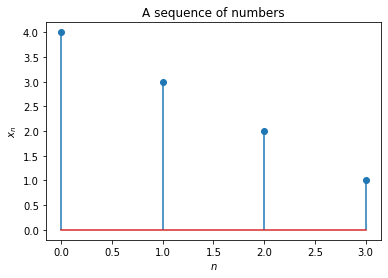

In [10]:
%matplotlib inline
import matplotlib.pyplot
matplotlib.pyplot.stem([4,3,2,1])
matplotlib.pyplot.ylabel(r'$x_n$')
matplotlib.pyplot.xlabel(r'$n$')
matplotlib.pyplot.title('A sequence of numbers')
matplotlib.pyplot.show()

It is common to rename `matplotlib.pyplot` as `plt`:


*import*   module_name   *as*   short_name or *import* package.module_name *as* short_name 

*from* module_name *import* function_name *as* short_name

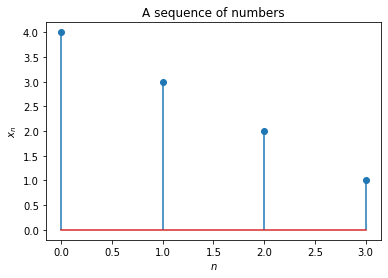

In [11]:
%matplotlib inline
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt #equivalent to above
plt.stem([4,3,2,1])
plt.ylabel(r'$x_n$')
plt.xlabel(r'$n$')
plt.title('A sequence of numbers')
plt.show()

We can also rename a function as we import it to avoid name collision:

In [11]:
from math import pow as fpow
fpow(2,2),pow(2,2)

(4.0, 4)

**Exercise** What is wrong with the following code?

In [12]:
import math as m
for m in range(5): m.pow(m,2)

AttributeError: 'int' object has no attribute 'pow'

name collision, *m* means a variable and a function name. Change it to another name.

**Exercise** Use the `randint` function from `random` to simulate the rolling of a die, by printing a random integer from 1 to 6. 

* `random` module is used to generate random numbers
* `random.randint(a, b)`: return a random integer N such that a <= N <= b

In [77]:
# YOUR CODE HERE
#from random import *  #import random package
from random import randint  #import randint function only
for i in range(1,5):
    print(randint(1,6))  #use a for loop to generate 4 random integers between 1 and 6

3
5
1
5


**A short summary of how to import**

1. import the package name directly. In this case you need to point out the module name when you call a function
   * *import* module_name
   
     module_name.function_name()

In [30]:
import math 
math.sin(2)

8.0

2. import specific functions from a module. In this case you can use the function name directly
   * *from* module_name *import* function_name1,function_name2,...
   
     function_name()

In [51]:
from math import sin
sin(2)

0.9092974268256817

3. import everything from a module. If you're unsure what to import, you can import everything. But it occupies more memory.
   * from module_name import *
   
     function_name()

In [35]:
from math import *

print(sin(2))
print(log(256,2))


0.9092974268256817
8.0


3. rename a module if it has a long name
   * *from* package_name *import* module_name *as* short_name
   * *import* package_name.module_name *as* short_name

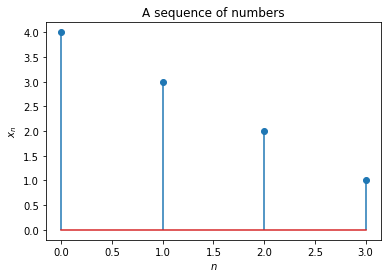

In [36]:
#in this example, matplotlib is a package, pyplot is a module
#stem() ylabel() are functions
%matplotlib inline
import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt #equivalent to the above line
plt.stem([4,3,2,1])
plt.ylabel(r'$x_n$')
plt.xlabel(r'$n$')
plt.title('A sequence of numbers')
plt.show()

## Built-in Functions (Optional)

**How to learn more about a function such as `randint`?**

There is a built-in function `help` for showing the *docstring* (documentation string). 

`help()` is used to display the documentation of an object to help user understand how it works.

In [18]:
import random
help(random.randint)  # random must be imported before

Help on method randint in module random:

randint(a, b) method of random.Random instance
    Return random integer in range [a, b], including both end points.



In [19]:
help(random)  # can also show the docstring of a module

Help on module random:

NAME
    random - Random variable generators.

MODULE REFERENCE
    https://docs.python.org/3.7/library/random
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
        integers
        --------
               uniform within range
    
        sequences
        ---------
               pick random element
               pick random sample
               pick weighted random sample
               generate random permutation
    
        distributions on the real line:
        ------------------------------
               uniform
               triangular
               normal (Gaussian)
               lognormal
               negative exponential
               gamma
             

In [78]:
help(int)

Help on class int in module builtins:

class int(object)
 |  int([x]) -> integer
 |  int(x, base=10) -> integer
 |  
 |  Convert a number or string to an integer, or return 0 if no arguments
 |  are given.  If x is a number, return x.__int__().  For floating point
 |  numbers, this truncates towards zero.
 |  
 |  If x is not a number or if base is given, then x must be a string,
 |  bytes, or bytearray instance representing an integer literal in the
 |  given base.  The literal can be preceded by '+' or '-' and be surrounded
 |  by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
 |  Base 0 means to interpret the base from the string as an integer literal.
 |  >>> int('0b100', base=0)
 |  4
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __and__(self, value, /)
 |      Return self&value.
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __ceil__(...)
 |      Ceiling of

**Does built-in functions belong to a module?**

Indeed, every function must come from a module. built-in functions are from \_builtin\_ module

In [62]:
__builtin__.print('I am from the __builtin__ module.')
print('I am from the __builtin__ module.') #print() function is from _builtin_ module

I am from the __builtin__ module.
I am from the __builtin__ module.


`__builtin__` module is automatically loaded because it provides functions that are commonly use for all programs.

**How to list everything in a module?** 

We can use the built-in function `dir` (*directory*).

dir(module_name) lists all the attributes and functions of an object (say functions , modules, strings)

In [80]:
dir(__builtin__)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIteration',
 'StopIter

We can also call `dir` without arguments.  
What does it print?

If no argument provided, dir() returns the list of variables and methods in the current local scope.

In [23]:
dir()

['In',
 'Out',
 'Random',
 'SystemRandom',
 '_',
 '_11',
 '_2',
 '_22',
 '_3',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__name__',
 '_dh',
 '_i',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'betavariate',
 'choice',
 'choices',
 'cs1302_site_packages',
 'exit',
 'expovariate',
 'fpow',
 'gammavariate',
 'gauss',
 'get_ipython',
 'getrandbits',
 'getstate',
 'i',
 'interact',
 'json',
 'log',
 'lognormvariate',
 'm',
 'matplotlib',
 'normalvariate',
 'paretovariate',
 'quit',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'sys',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate',
 'x',
 'yapf_reformat']